# Using CNN

In [108]:
import sys
import os
import numpy as np
import cv2
import Levenshtein
import difflib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import logging
from skimage.morphology import (erosion, dilation, closing, opening)

# preprocessing dataset
Function to preprocess image (convert to grayscale and apply binary thresholding)

In [2]:
# element = np.array([[0, 0, 0, 0],
#                     [0, 1, 1, 0],
#                     [0, 1, 1, 0],
#                     [0, 0, 0, 0]], np.uint8)

element4 = np.array([[0, 0, 0, 0],
                    [0, 1, 1, 0],
                    [0, 1, 1, 0],
                    [0, 0, 0, 0]])

# element = np.array([[0, 0, 0, 0, 0],
#                     [0, 1, 1, 1, 0],
#                     [0, 1, 1, 1, 0],
#                     [0, 1, 1, 1, 0],
#                     [0, 0, 0, 0, 0]], np.uint8)

element5 = np.array([[0, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 1, 1, 1, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 0]])

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # binary_img = opening(binary_img, element5)
    # binary_img = erosion(binary_img, element4)
    # binary_img = dilation(binary_img, element2)
    # binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_HITMISS, element)
    return img, binary_img

# Displaying the input images and binary images

In [3]:
def display_image(img, binary_img, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original {title}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_img, cmap='gray')
    plt.title(f"Binary {title}")
    plt.axis('off')

    plt.show()

# Function to find and draw contours

In [4]:
def segment_characters(binary_img, max_width=10, max_height=10):
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        if w > max_width and h > max_height:
            filtered_contours.append(contour)
            
    filtered_contours = sorted(filtered_contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    return filtered_contours

# Function to display contours

In [5]:
def display_contours(img, contours, title):
    img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_with_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.figure(figsize=(10, 5))
    plt.imshow(img_with_contours)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Samples of segmented charactests

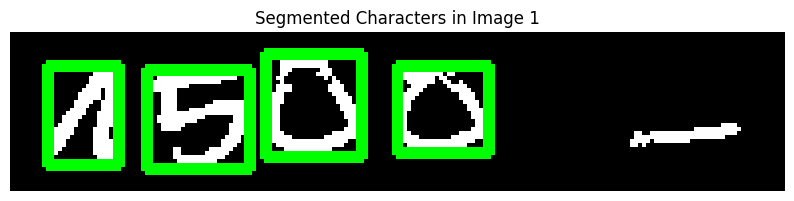

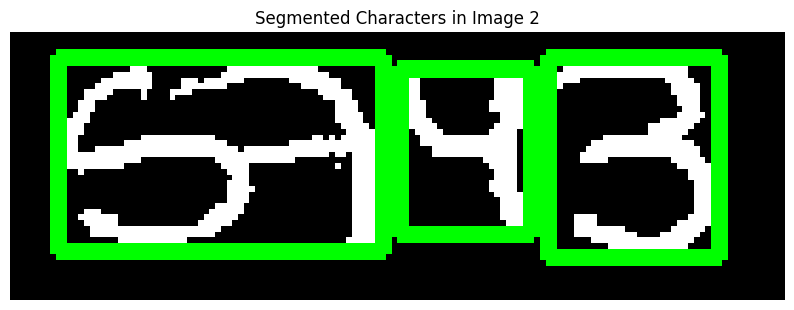

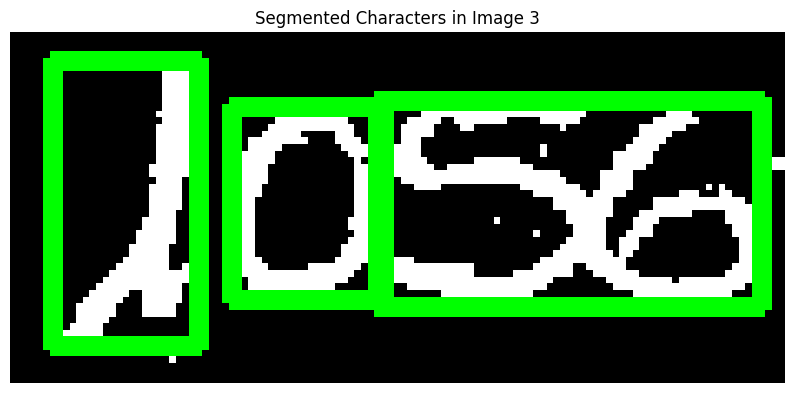

In [6]:
image_paths = ['./ORAND-CAR-2014/CAR-A/a_test_images/a_car_007000.png',
               "./ORAND-CAR-2014/CAR-A/a_test_images/a_car_007001.png",
               "./ORAND-CAR-2014/CAR-A/a_test_images/a_car_007002.png"]

# image_paths = ['./ORAND-CAR-2014/CAR-A/a_train_images/a_car_000155.png',
#                "./ORAND-CAR-2014/CAR-A/a_train_images/a_car_000156.png",
#                "./ORAND-CAR-2014/CAR-A/a_train_images/a_car_000157.png"]
for i, image_path in enumerate(image_paths):
    original, binary = preprocess_image(image_path)
    # display_image(original, binary, Image {i + 1})
    contours = segment_characters(binary)
    display_contours(binary, contours, f"Segmented Characters in Image {i + 1}")



# Training a MNIST model

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)
model.save('mnist_cnn_model.h5')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9126 - loss: 0.2837 - val_accuracy: 0.9822 - val_loss: 0.0539
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0481 - val_accuracy: 0.9884 - val_loss: 0.0361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9911 - loss: 0.0289 - val_accuracy: 0.9885 - val_loss: 0.0343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9929 - loss: 0.0211 - val_accuracy: 0.9913 - val_loss: 0.0262
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9909 - val_loss: 0.0280


# preprocess character image for prediction

In [7]:
def preprocess_char_img(char_img):
    char_img = cv2.resize(char_img, (28, 28), interpolation=cv2.INTER_AREA)
    char_img = char_img.astype('float32') / 255.0
    char_img = np.expand_dims(char_img, axis=-1)
    char_img = np.expand_dims(char_img, axis=0)
    return char_img

# Function to recognize characters

In [8]:
def recognize_characters(model, binary_img, contours):
    recognized_digits = ""
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        char_img = binary_img[y:y + h, x:x + w]
        char_img = preprocess_char_img(char_img)
        prediction = model.predict(char_img)
        recognized_digit = np.argmax(prediction)
        recognized_digits = recognized_digits + str(recognized_digit)
    return recognized_digits

In [9]:
model = load_model('mnist_cnn_model.h5')

image_folder = './ORAND-CAR-2014/CAR-A/a_test_images'
image_gt = "./ORAND-CAR-2014/CAR-A/a_test_gt.txt"
with open(image_gt, 'r') as file:
    lines = file.readlines()

file_names = []
labels = []
for line in lines:
    line = line.strip()
    name, num = line.split()
    file_names.append(name)
    labels.append(num)

sim = 0.0
equality = 0
for i, file in enumerate(file_names):
    image_path = os.path.join(image_folder, file)
    original, binary = preprocess_image(image_path)
    contours = segment_characters(binary)
    recognized_digits = recognize_characters(model, binary, contours)
    print(f"Recognized digits in {file}: {recognized_digits} {labels[i]}")
    similarity = difflib.SequenceMatcher(None, recognized_digits, labels[i]).ratio()
    sim += similarity
    if (int(recognized_digits) == int(labels[i])):
        # print(f"Recognized digits in {file}: {recognized_digits} {labels[i]}")
        equality += 1
print(sim, " out of ", len(labels), "are similar.")
print("Similarity accuracy: ", sim/float(len(labels)))
print(equality, " out of ", len(labels), "are equal.")
print("Equality accuracy: ", float(equality)/float(len(labels)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Recognized digits in a_car_007000.png: 1500 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Recognized digits in a_car_007001.png: 473 5743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Recognized digits in a_car_007002.png: 107 1056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Recognized digits in a_car_007003.png: 61 1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Recognized digits in a_car_007004.png: 101 1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Recognized digits in a_car_007005.png: 684 2800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

# Using CNN & RNN

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import layers, Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K

# preprocess image
In preprocess_image_crop, The width and height are **cropped** if they are greater than 256 and 64 respectively.<br><br>
in preprocess_image_resize, The width and height are **resized** if they are greater than 256 and 64 respectively.

In [3]:
def preprocess_image_crop(image_path, big_w, big_h, w_img, h_img):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    (h, w) = img.shape
    
    final_img = np.ones([64, 256])*255 # black white image
    # crop
    if w > 256:
        if w > big_w:
            w_img = img
            big_w = w
        img = img[:, :256]
        
    if h > 64:
        if h > big_h:
            h_img = img
            big_h = h
        img = img[:64, :]
    
    
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE), big_w, big_h, w_img, h_img



def preprocess_image_resize(image_path, big_w, big_h, w_img, h_img):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    (h, w) = img.shape
    
    final_img = np.ones([64, 256])*255 # black white image
    # crop
    if w > 256:
        img = img = cv2.resize(img, (256, h))
        if w > big_w:
            w_img = img
            big_w = w
        w = 256
        
    if h > 64:
        img = img = cv2.resize(img, (w, 64))
        if h > big_h:
            h_img = img
            big_h = h
        h = 64
    
    # print(h, w)
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE), big_w, big_h, w_img, h_img

# Function to read file names and labels

In [4]:
def read_labels(image_folder, image_gt):
    big_w = 0.0
    big_h = 0.0
    path = './ORAND-CAR-2014/CAR-A/a_train_images/a_car_000154.png'
    w_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    h_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    with open(image_gt, 'r') as file:
        lines = file.readlines()

    file_names = []
    labels = []
    for line in lines:
        line = line.strip()
        name, num = line.split()
        file_names.append(name)
        labels.append(num)

    images = []
    for file in file_names:
        image_path = os.path.join(image_folder, file)
        # img, big_w, big_h, w_img, h_img = preprocess_image_crop(image_path, big_w, big_h, w_img, h_img)
        img, big_w, big_h, w_img, h_img = preprocess_image_resize(image_path, big_w, big_h, w_img, h_img)
        images.append(img)
    
    plt.imshow(w_img, cmap='gray')
    plt.show()
    print(big_w)
    plt.imshow(h_img, cmap='gray')
    plt.show()
    print(big_h)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Loading the train and test sets

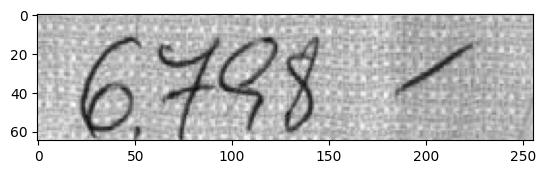

345


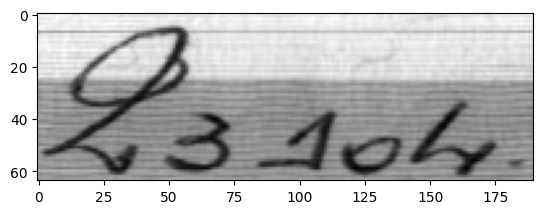

108


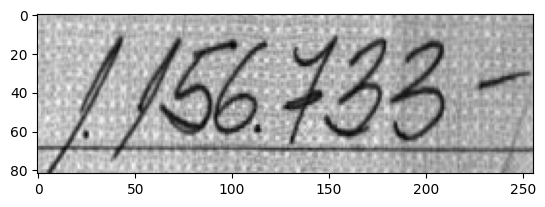

363


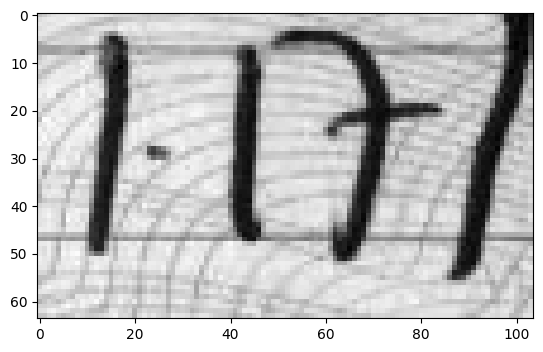

96


In [5]:
train_image_folder = './ORAND-CAR-2014/CAR-A/a_train_images'
train_image_gt = "./ORAND-CAR-2014/CAR-A/a_train_gt.txt"
test_image_folder = './ORAND-CAR-2014/CAR-A/a_test_images'
test_image_gt = "./ORAND-CAR-2014/CAR-A/a_test_gt.txt"

train_images, train_labels = read_labels(train_image_folder, train_image_gt)
test_images, test_labels = read_labels(test_image_folder, test_image_gt)

train_size = len(train_images)
valid_size= len(test_images)

# Preparing the labels for CTC Loss

In [6]:
alphabets = u"0123456789" 
max_str_len = 8 # max length of input labels
num_of_characters = len(alphabets) + 1 # +1 for ctc pseudo blank(epsilon)
num_of_timestamps = 64 # max length of predicted labels


def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch)) 
        #find() method returns the lowest index of the substring if it is found in given string otherwise -1
        
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

In [7]:
train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(train_labels[i])
    train_y[i, 0:len(train_labels[i])]= label_to_num(train_labels[i])    

valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(test_labels[i])
    valid_y[i, 0:len(test_labels[i])]= label_to_num(test_labels[i])    

print('True label : ',train_labels[100] , '\ntrain_y : ',train_y[100],'\ntrain_label_len : ',train_label_len[100], 
      '\ntrain_input_len : ', train_input_len[100])

True label :  2200 
train_y :  [ 2.  2.  0.  0. -1. -1. -1. -1.] 
train_label_len :  [4.] 
train_input_len :  [62.]


# Build the model and compile it

In [8]:
input_shape = (256, 64, 1)
input_data = Input(shape=input_shape, name='input')

inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
inner = Dropout(0.3)(inner)

# CNN to RNN
inner = Reshape(target_shape=((64, 1024)), name='reshape')(inner)
inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

## OUTPUT
inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)


model = Model(input_data, y_pred)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 256, 64, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 256, 64, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 64, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 64, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max1 (MaxPooling2D)             │ (None, 128, 32, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 128, 32, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 32, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 32, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max2 (MaxPooling2D)             │ (None, 64, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max3 (MaxPooling2D)             │ (None, 64, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 64, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64, 64)         │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm1 (Bidirectional)           │ (None, 64, 512)        │       657,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm2 (Bidirectional)           │ (None, 64, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64, 11)         │         5,643 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 64, 11)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,397,131 (9.14 MB)

 Trainable params: 2,396,683 (9.14 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
# the ctc loss function
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

# the loss calculation occurs elsewhere, so we use a dummy lambda function for the loss
file_path_best = "RNN_model.keras"

model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam())

checkpoint = ModelCheckpoint(filepath=file_path_best, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

earlystop = EarlyStopping(monitor='val_loss',
                          patience=5
                          )

callbacks_list = [earlystop, checkpoint]
                                                                                                                  

Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 11.4001
Epoch 1: val_loss improved from inf to 11.15036, saving model to C_LSTM_best.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - loss: 11.3765 - val_loss: 11.1504
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 10.1178
Epoch 2: val_loss did not improve from 11.15036
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - loss: 10.1131 - val_loss: 11.7320
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 9.5791
Epoch 3: val_loss improved from 11.15036 to 10.37240, saving model to C_LSTM_best.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - loss: 9.5697 - val_loss: 10.3724
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 8.8499
Epoch 4: val_loss improved from 10.37240 to 8.94215, saving model to C_LSTM_best.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - loss: 8.8367 - val_loss: 8.9422
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 7.9107
Epoch 5: val_loss improved from 8.94215 to 8.21927, saving model to C_LSTM_

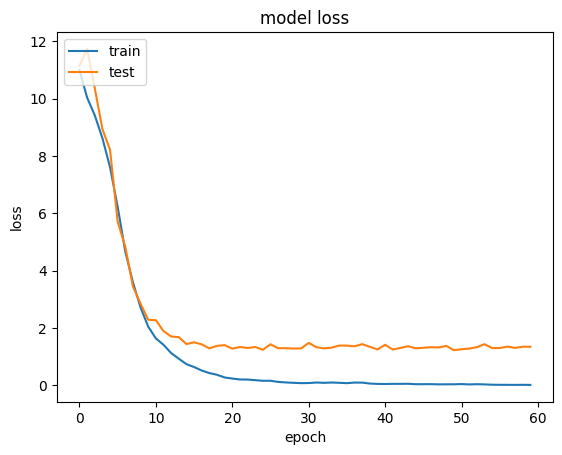

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/C_LSTM_best.keras'

In [26]:
history = model_final.fit(x=[train_images, train_y, train_input_len, train_label_len],
                          y=train_output,validation_data=([test_images, valid_y, valid_input_len, valid_label_len], valid_output),
                          callbacks=callbacks_list,
                          verbose=1,
                          epochs=60,
                          batch_size=128,
                          shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()